<a href="https://colab.research.google.com/github/pabloezquerroo/TFG/blob/main/Maquina/Maquina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entrenamiento del Modelo**

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
from keras.preprocessing.image import ImageDataGenerator #preproceso de imágenes
from keras import optimizers #optimizador para el algoritmo
from keras.models import Sequential #redes neuronales secuenciales
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers import  Convolution2D, MaxPooling2D
from keras import backend as K #si hay una sesion keras en background la mata
import os

In [82]:
K.clear_session()
data_entrenamiento= '/content/drive/MyDrive/TFG/Imágenes/Entrenamiento'
data_validacion= '/content/drive/MyDrive/TFG/Imágenes/Validacion'

def listar_contenido_directorio(ruta):
    for root, dirs, files in os.walk(ruta):
        print(f"Directorio: {root}")
        print(f"Subdirectorios: {dirs}")
        print(f"Archivos: {files}")

listar_contenido_directorio(data_entrenamiento)
listar_contenido_directorio(data_validacion)

Directorio: /content/drive/MyDrive/TFG/Imágenes/Entrenamiento
Subdirectorios: ['Router', 'DNS', 'Link', 'Switch']
Archivos: []
Directorio: /content/drive/MyDrive/TFG/Imágenes/Entrenamiento/Router
Subdirectorios: []
Archivos: ['r (13).png', 'r (32).png', 'r (29).png', 'r (19).png', 'r (23).png', 'r (18).png', 'r (38).png', 'r (9).png', 'r (27).png', 'r (3).png', 'r (34).png', 'r (36).png', 'r (26).png', 'r (33).png', 'r (39).png', 'r (7).png', 'r (28).png', 'r (20).png', 'r (1).png', 'r (15).png', 'r (35).png', 'r (16).png', 'r (25).png', 'r (4).png', 'r (22).png', 'r (31).png', 'r (6).png', 'r (2).png', 'r (24).png', 'r (37).png', 'r (14).png', 'r (11).png', 'r (10).png', 'r (12).png', 'r (21).png', 'r (17).png', 'r (8).png', 'r (40).png', 'r (5).png', 'r (30).png']
Directorio: /content/drive/MyDrive/TFG/Imágenes/Entrenamiento/DNS
Subdirectorios: []
Archivos: ['d (31).png', 'd (35).png', 'd (24).png', 'd (25).png', 'd (12).png', 'd (37).png', 'd (20).png', 'd (6).png', 'd (23).png',

In [83]:
# Parametros

epocas = 20 # numero de iteraciones en el set de datos
altura, longitud= 100, 100 # tamaño al que procesamos las imágenes
batch_size_entrenamiento = 40 # numero de imagenes a procesar
batch_size_validacion = 22 # numero de imagenes a procesar
pasos = 4 # numero de pasos en cada una de las epocas (total de datos de entrenamiento / pasos)
pasos_validacion = 2 # numero de pasos al final de las epocas (total de datos de validacion / pasos)
filtrosConv1 = 32 # numero de filtros
filtrosConv2 = 64 # numero de filtros
filtrosConv3 = 64 # numero de filtros
tamano_filtro1 =(3,3)
tamano_filtro2 =(3,3)
tamano_filtro3 =(3,3)
tamano_pool = (2,2)
clases = 4 # tipos de salidas
lr = 0.0008 # como de grande van a ser los ajustes para acercarse a la solucion óptima

# pre-procesamiento de imagenes

entrenamiento_datagen= ImageDataGenerator(
    rescale=1./255, # reescalamos de 0 a 1 los píxeles
    shear_range=0.3, # algunas de las imágenes las inclina
    zoom_range=0.3, # algunas de las imágenes las amplia
    horizontal_flip = True
)

validacion_datagen = ImageDataGenerator(
    rescale = 1./255
)

imagen_entrenamiento = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size= (altura, longitud),
    batch_size=batch_size_entrenamiento,
    class_mode='categorical',
    color_mode='grayscale'
)

imagen_validacion = validacion_datagen.flow_from_directory(
    data_validacion,
    target_size= (altura, longitud),
    batch_size=batch_size_validacion,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 160 images belonging to 4 classes.
Found 44 images belonging to 4 classes.


In [84]:
# Creamos la red convolucional

cnn = Sequential()

# Primera capa
cnn.add(Convolution2D(filtrosConv1, tamano_filtro1, padding= 'same', input_shape=(altura, longitud, 1), activation='relu'))

# Segunda capa
cnn.add(MaxPooling2D(pool_size=tamano_pool))

# Tercera capa
cnn.add(Convolution2D(filtrosConv2, tamano_filtro2, padding= 'same', activation='relu'))

# Cuarta capa
cnn.add(MaxPooling2D(pool_size=tamano_pool))

# Quinta capa
cnn.add(Convolution2D(filtrosConv3, tamano_filtro3, padding= 'same', activation='relu'))

# Sexta capa
cnn.add(MaxPooling2D(pool_size=tamano_pool))

cnn.add(Flatten()) # La imagen que tenemos profunda la hacemos plana, 1 dimension con toda la informacion
cnn.add(Dense(256, activation='relu')) # La imagen plana se la pasamos a una nueva capa en la que todas las neuronas estan conectadas a las de la anterior
cnn.add(Dropout(0.5)) # En cada paso de entrenamiento apagamos la mitad de las neuronas a la capa densa para evitar sobreajustar.
cnn.add(Dense(clases, activation='softmax')) # Capa final para clasificar

# Durante el entrenamiento la funcion de perdida va a ser categorical crossentropy
# Optimizador Adam
# Metrica de porcentaje para saber como de bien esta aprendiendo la red
cnn.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=lr), metrics=['accuracy'])

# Entrenamos la red con la imagen de entrenamiento, cada epoca tiene 1000 pasos, 20 epocas.
# Despues de cada epoca va a correr 200 pasos de validacion
history = cnn.fit(
    imagen_entrenamiento,
    steps_per_epoch=pasos,
    epochs=epocas,
    validation_data=imagen_validacion,
    validation_steps=pasos_validacion
    )


# Guardar el modelo entrenado
# model.save('/content/drive/MyDrive/TFG/mi_modelo.h5')



Epoch 1/20
4/4 [==============================] - 5s 821ms/step - loss: 1.5104 - accuracy: 0.2000 - val_loss: 1.3514 - val_accuracy: 0.3182
Epoch 2/20
4/4 [==============================] - 3s 713ms/step - loss: 1.4129 - accuracy: 0.2688 - val_loss: 1.3849 - val_accuracy: 0.2727
Epoch 3/20
4/4 [==============================] - 5s 1s/step - loss: 1.3898 - accuracy: 0.2375 - val_loss: 1.3755 - val_accuracy: 0.1818
Epoch 4/20
4/4 [==============================] - 3s 716ms/step - loss: 1.3706 - accuracy: 0.2875 - val_loss: 1.3558 - val_accuracy: 0.4318
Epoch 5/20
4/4 [==============================] - 3s 718ms/step - loss: 1.3509 - accuracy: 0.3250 - val_loss: 1.3058 - val_accuracy: 0.5000
Epoch 6/20
4/4 [==============================] - 5s 1s/step - loss: 1.3220 - accuracy: 0.3812 - val_loss: 1.2224 - val_accuracy: 0.6818
Epoch 7/20
4/4 [==============================] - 4s 790ms/step - loss: 1.2227 - accuracy: 0.5500 - val_loss: 1.0481 - val_accuracy: 0.8182
Epoch 8/20
4/4 [==========

2/2 [==============================] - 0s 92ms/step - loss: 0.3117 - accuracy: 0.9773
Precisión en datos de validación: 0.9772727489471436


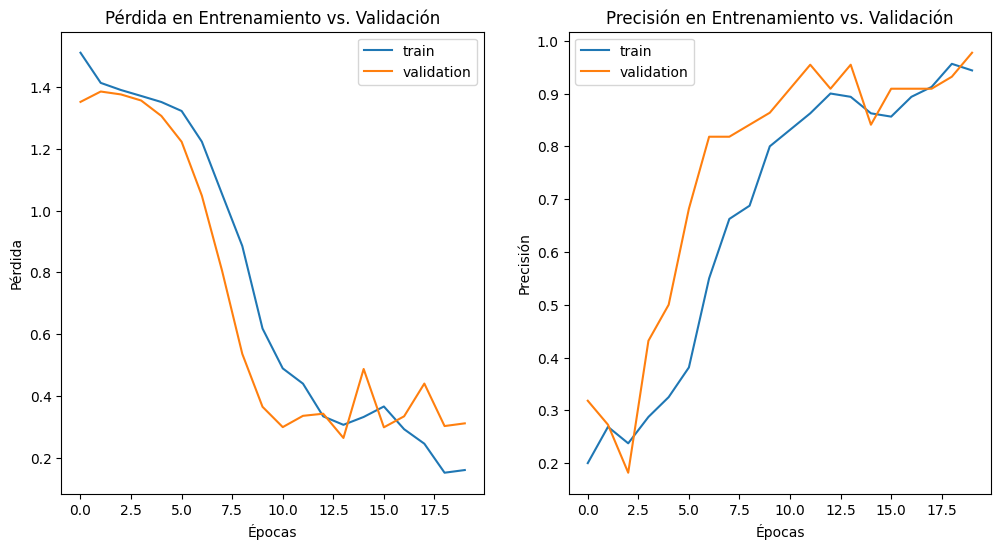

2/2 [==============================] - 0s 85ms/step
Matriz de Confusión:
[[4 3 3 4]
 [5 0 2 1]
 [2 2 1 3]
 [2 3 3 6]]
Informe de Clasificación:
              precision    recall  f1-score   support

         DNS       0.31      0.29      0.30        14
        Link       0.00      0.00      0.00         8
      Router       0.11      0.12      0.12         8
      Switch       0.43      0.43      0.43        14

    accuracy                           0.25        44
   macro avg       0.21      0.21      0.21        44
weighted avg       0.25      0.25      0.25        44



In [85]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Paso 1: Calcular la precisión en datos de validación
validation_loss, validation_accuracy = cnn.evaluate(imagen_validacion)
print(f'Precisión en datos de validación: {validation_accuracy}')

# Paso 2: Graficar la curva de aprendizaje
import matplotlib.pyplot as plt

def plot_learning_curve(history):
    plt.figure(figsize=(12, 6))

    # Pérdida en conjunto de entrenamiento
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title('Pérdida en Entrenamiento vs. Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    # Precisión en conjunto de entrenamiento
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.title('Precisión en Entrenamiento vs. Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    plt.show()

plot_learning_curve(history)

# Paso 3: Realizar predicciones en datos de validación
y_pred = cnn.predict(imagen_validacion)
y_pred_classes = np.argmax(y_pred, axis=1)

# Paso 4: Matriz de Confusión
confusion = confusion_matrix(imagen_validacion.classes, y_pred_classes)
print("Matriz de Confusión:")
print(confusion)

# Paso 5: Informe de Clasificación
class_labels = list(imagen_validacion.class_indices.keys())
print("Informe de Clasificación:")
print(classification_report(imagen_validacion.classes, y_pred_classes, target_names=class_labels))


# **`Prueba del modelo`**

In [86]:

data_prueba= '/content/drive/MyDrive/TFG/Imágenes/Prueba'

def listar_contenido_directorio(ruta):
    for root, dirs, files in os.walk(ruta):
        print(f"Directorio: {root}")
        print(f"Subdirectorios: {dirs}")
        print(f"Archivos: {files}")

listar_contenido_directorio(data_prueba);


Directorio: /content/drive/MyDrive/TFG/Imágenes/Prueba
Subdirectorios: []
Archivos: ['p (4).png', 'p (13).png', 'p (15).png', 'p (11).png', 'p (12).png', 'p (16).png', 'p (14).png', 'p (10).png', 'p (9).png', 'p (5).png', 'p (7).png', 'p (8).png', 'p (6).png', 'p (2).png', 'p (1).png', 'p (3).png']


In [87]:
from keras.preprocessing import image
import numpy as np

# Cargar la imagen
img = image.load_img('/content/drive/MyDrive/TFG/Imágenes/Prueba/p (16).png', target_size=(altura, longitud), color_mode='grayscale')

# Convertir la imagen a un array de numpy y expandir las dimensiones
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Preprocesar la imagen como lo hiciste con tus datos de entrenamiento
img_array /= 255.

# Hacer la predicción
prediccion = cnn.predict(img_array)

# Obtener la clase predicha
clase_predicha = np.argmax(prediccion, axis=1)

indice_a_clase = {0: 'DNS', 1: 'Link', 2: 'Router', 3: 'Switch'}

# Usa este valor para buscar en el diccionario
clase_predicha_etiqueta = indice_a_clase[clase_predicha[0]]

print(f'El modelo ha predicho: {clase_predicha_etiqueta}')

1/1 [==============================] - 0s 98ms/step
El modelo ha predicho: Switch


In [88]:
from keras.preprocessing import image
import numpy as np

# Mapeo de índices a clases
indice_a_clase = {0: 'DNS', 1: 'Link', 2: 'Router', 3: 'Switch'}

# Bucle for para cargar y predecir cada imagen
for i in range(1, 17):
    # Cargar la imagen
    img = image.load_img(f'/content/drive/MyDrive/TFG/Imágenes/Prueba/p ({i}).png', target_size=(altura, longitud), color_mode='grayscale')

    # Convertir la imagen a un array de numpy y expandir las dimensiones
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocesar la imagen como lo hiciste con tus datos de entrenamiento
    img_array /= 255.

    # Hacer la predicción
    prediccion = cnn.predict(img_array)

    # Obtener la clase predicha
    clase_predicha = np.argmax(prediccion, axis=1)

    # Usa este valor para buscar en el diccionario
    clase_predicha_etiqueta = indice_a_clase[clase_predicha[0]]

    print(f'El modelo ha predicho para la imagen p ({i}): {clase_predicha_etiqueta}')


1/1 [==============================] - 0s 84ms/step
El modelo ha predicho para la imagen p (1): Router
1/1 [==============================] - 0s 27ms/step
El modelo ha predicho para la imagen p (2): Router
1/1 [==============================] - 0s 25ms/step
El modelo ha predicho para la imagen p (3): Router
1/1 [==============================] - 0s 25ms/step
El modelo ha predicho para la imagen p (4): Router
1/1 [==============================] - 0s 25ms/step
El modelo ha predicho para la imagen p (5): Link
1/1 [==============================] - 0s 32ms/step
El modelo ha predicho para la imagen p (6): Router
1/1 [==============================] - 0s 28ms/step
El modelo ha predicho para la imagen p (7): Link
1/1 [==============================] - 0s 27ms/step
El modelo ha predicho para la imagen p (8): Link
1/1 [==============================] - 0s 26ms/step
El modelo ha predicho para la imagen p (9): DNS
1/1 [==============================] - 0s 26ms/step
El modelo ha predicho para la 